In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/kaggle/input/twitter-airline-sentiment/Tweets.csv')

In [3]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [5]:
df = df[['airline', 'airline_sentiment', 'text']]
df

,airline,airline_sentiment,text
0,Virgin America,neutral,@VirginAmerica What @dhepburn said.
1,Virgin America,positive,@VirginAmerica plus you've added commercials t...
2,Virgin America,neutral,@VirginAmerica I didn't today... Must mean I n...
3,Virgin America,negative,@VirginAmerica it's really aggressive to blast...
4,Virgin America,negative,@VirginAmerica and it's a really big bad thing...
...,...,...,...
14635,American,positive,@AmericanAir thank you we got on a different f...
14636,American,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,American,neutral,@AmericanAir Please bring American Airlines to...
14638,American,negative,"@AmericanAir you have my money, you change my ..."


In [6]:
import re

def clean_tweet(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www.\S+", "", text)      # remove URLs
    text = re.sub(r"@[A-Za-z0-9_]+", "", text)       # remove @mentions
    text = re.sub(r"#", "", text)                    # remove hashtags symbol
    text = re.sub(r"[^a-z\s]", "", text)             # remove punctuation/numbers
    text = re.sub(r"\s+", " ", text).strip()         # remove extra spaces
    return text

df.loc[:, "text"] = df["text"].apply(clean_tweet)

In [7]:
df

,airline,airline_sentiment,text
0,Virgin America,neutral,what said
1,Virgin America,positive,plus youve added commercials to the experience...
2,Virgin America,neutral,i didnt today must mean i need to take another...
3,Virgin America,negative,its really aggressive to blast obnoxious enter...
4,Virgin America,negative,and its a really big bad thing about it
...,...,...,...
14635,American,positive,thank you we got on a different flight to chicago
14636,American,negative,leaving over minutes late flight no warnings o...
14637,American,neutral,please bring american airlines to blackberry
14638,American,negative,you have my money you change my flight and don...


In [8]:
df.drop_duplicates(subset="text", inplace=True)
df.dropna(subset=["text"], inplace=True)
df = df[df["text"].str.strip() != ""]
df.reset_index(drop=True, inplace=True)

/tmp/ipykernel_13/767398963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset="text", inplace=True)
/tmp/ipykernel_13/767398963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=["text"], inplace=True)


In [9]:
df


,airline,airline_sentiment,text
0,Virgin America,neutral,what said
1,Virgin America,positive,plus youve added commercials to the experience...
2,Virgin America,neutral,i didnt today must mean i need to take another...
3,Virgin America,negative,its really aggressive to blast obnoxious enter...
4,Virgin America,negative,and its a really big bad thing about it
...,...,...,...
14168,American,positive,thank you we got on a different flight to chicago
14169,American,negative,leaving over minutes late flight no warnings o...
14170,American,neutral,please bring american airlines to blackberry
14171,American,negative,you have my money you change my flight and don...


In [10]:
df.to_csv("clean_airline_tweets.csv", index=False)

In [11]:
df["word_count"] = df["text"].apply(lambda x: len(str(x).split()))
df["char_count"] = df["text"].apply(lambda x: len(str(x)))
df["sentence_count"] = df["text"].apply(lambda x: max(1, (x.count(".") + x.count("!") + x.count("?"))))

In [12]:
df[["word_count", "char_count", "sentence_count"]].describe()

,word_count,char_count,sentence_count
count,14173.000000,14173.000000,14173.0
mean,16.174628,85.402314,1.0
std,6.598923,34.281095,0.0
min,1.000000,1.000000,1.0
25%,11.000000,59.000000,1.0
50%,17.000000,94.000000,1.0
75%,22.000000,115.000000,1.0
max,31.000000,165.000000,1.0


In [13]:
df

,airline,airline_sentiment,text,word_count,char_count,sentence_count
0,Virgin America,neutral,what said,2,9,1
1,Virgin America,positive,plus youve added commercials to the experience...,8,52,1
2,Virgin America,neutral,i didnt today must mean i need to take another...,11,51,1
3,Virgin America,negative,its really aggressive to blast obnoxious enter...,16,105,1
4,Virgin America,negative,and its a really big bad thing about it,9,39,1
...,...,...,...,...,...,...
14168,American,positive,thank you we got on a different flight to chicago,10,49,1
14169,American,negative,leaving over minutes late flight no warnings o...,20,128,1
14170,American,neutral,please bring american airlines to blackberry,6,44,1
14171,American,negative,you have my money you change my flight and don...,22,116,1


In [14]:
import matplotlib.pyplot as plt

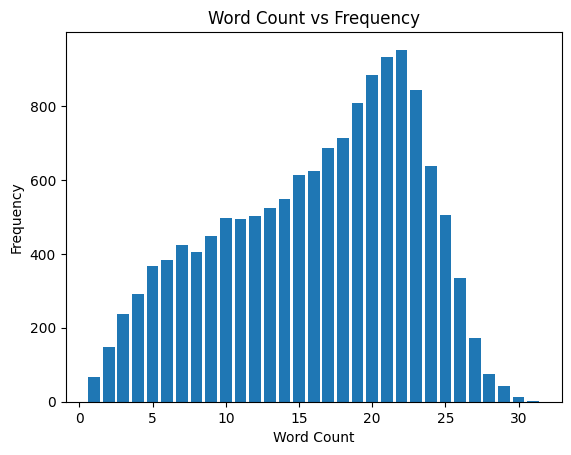

In [15]:
freq = df['word_count'].value_counts().sort_index()
plt.bar(freq.index, freq.values)
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Word Count vs Frequency")
plt.savefig("wordCount vs Frequency.png")
plt.show()

In [16]:
airline_matrix = df.groupby(["airline", "airline_sentiment"]).size().unstack(fill_value=0)
print(airline_matrix)

airline_sentiment  negative  neutral  positive
airline                                       
American               1857      417       277
Delta                   950      659       509
Southwest              1183      638       547
US Airways             2260      363       239
United                 2629      685       465
Virgin America          181      167       147


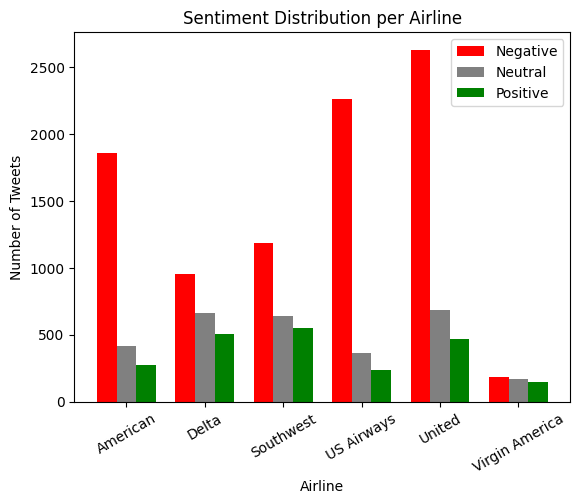

In [17]:
categories = ["negative", "neutral", "positive"]
airlines = airline_matrix.index
x = np.arange(len(airlines))  
width = 0.25

plt.bar(x - width, airline_matrix["negative"], width, label="Negative", color="red")
plt.bar(x, airline_matrix["neutral"], width, label="Neutral", color="gray")
plt.bar(x + width, airline_matrix["positive"], width, label="Positive", color="green")

plt.xlabel("Airline")
plt.ylabel("Number of Tweets")
plt.title("Sentiment Distribution per Airline")
plt.xticks(x, airlines, rotation=30)
plt.legend()
plt.savefig("airline_sentiment.png")
plt.show()

# **Conclusion**

#  1) Cleaned DataSet

In [18]:
df

,airline,airline_sentiment,text,word_count,char_count,sentence_count
0,Virgin America,neutral,what said,2,9,1
1,Virgin America,positive,plus youve added commercials to the experience...,8,52,1
2,Virgin America,neutral,i didnt today must mean i need to take another...,11,51,1
3,Virgin America,negative,its really aggressive to blast obnoxious enter...,16,105,1
4,Virgin America,negative,and its a really big bad thing about it,9,39,1
...,...,...,...,...,...,...
14168,American,positive,thank you we got on a different flight to chicago,10,49,1
14169,American,negative,leaving over minutes late flight no warnings o...,20,128,1
14170,American,neutral,please bring american airlines to blackberry,6,44,1
14171,American,negative,you have my money you change my flight and don...,22,116,1


# 2)WordCount

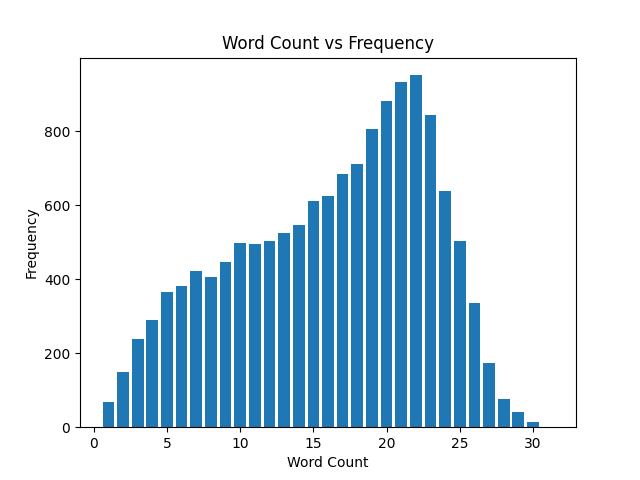

In [19]:
from IPython.display import Image, display

display(Image(filename="/kaggle/working/wordCount vs Frequency.png"))

# 3)Airline Sentiment Analysis

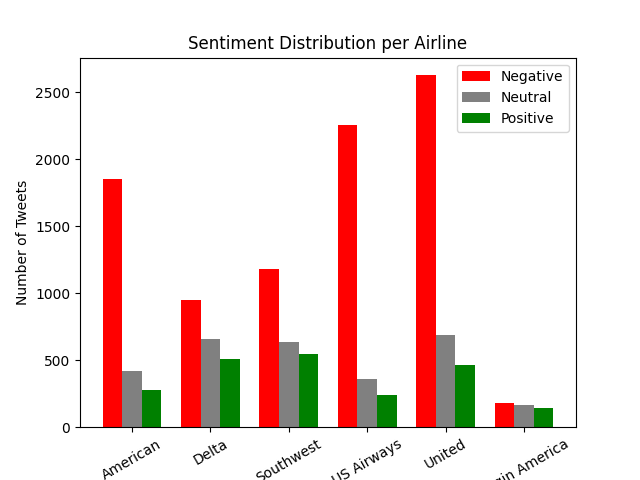

In [20]:
display(Image(filename="airline_sentiment.png"))